# Final Project
## Andrew Messing & Steven Patrick
### Monster Hunter (Kaggle)
#### 5/7/2018

# These are the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import csv

%matplotlib inline

# Importing the data

In [2]:
TestPoints = pd.read_csv("test.csv")
TrainPoints = pd.read_csv("train.csv")
TrainPoints.head(2)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin


# Here is where we normalize the data

In [3]:
colors = ["white", "black", "clear", "blue", "green", "blood"]
for i in range(0,len(TestPoints)):
    c = TestPoints.loc[i,("color")]
    TestPoints.loc[i,("color")] = colors.index(c)


for i in range(0,len(TrainPoints)):
    c = TrainPoints.loc[i,("color")]
    TrainPoints.loc[i,("color")] = colors.index(c)
        
TrainValsLabels = TrainPoints.values
TrainVals = TrainValsLabels[:,:-1]
TrainLabels = TrainValsLabels[:,-1]
TestVals = TestPoints.values

# Here is where we will implement PCA

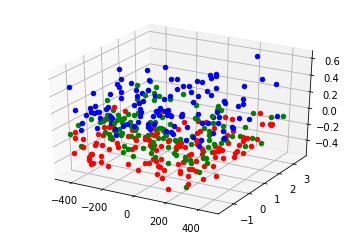

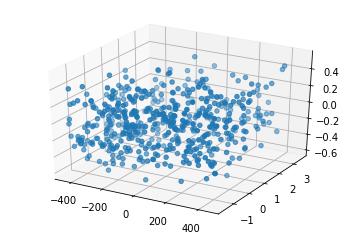

In [4]:


pca = PCA(n_components=3)
pcaTrain = pca.fit_transform(TrainVals)
pcaTest = pca.transform(TestVals)

fig1 = plt.figure()
ax = fig1.add_subplot(111,projection='3d')
for i in range(0,len(TrainPoints)):
    t = TrainPoints.loc[i,'type']
    j = pcaTrain[i]
    if(t == 'Ghoul'):
        ax.scatter(j[0],j[1],j[2],c='r',label = 'Ghoul')
    elif(t == 'Ghost'):
        ax.scatter(j[0],j[1],j[2],c='b',label = 'Ghost')
    else:
        ax.scatter(j[0],j[1],j[2],c='g',label = 'Goblin')
plt.show()

fig2 = plt.figure()
ax = fig2.add_subplot(111,projection='3d')
ax.scatter(pcaTest[:,0],pcaTest[:,1],pcaTest[:,2])
plt.show()

# Here is where we will implement FLD

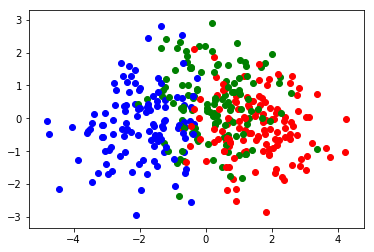

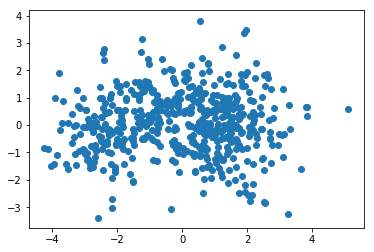

In [5]:
fld = LinearDiscriminantAnalysis(n_components = 7)
fldTrain = fld.fit_transform(TrainVals, TrainLabels)
fldTest = fld.transform(TestVals)
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(0,len(TrainPoints)):
    t = TrainPoints.loc[i,'type']
    j = fldTrain[i]
    if(t == 'Ghoul'):
        ax.scatter(j[0],j[1],c='r',label = 'Ghoul')
    elif(t == 'Ghost'):
        ax.scatter(j[0],j[1],c='b',label = 'Ghost')
    else:
        ax.scatter(j[0],j[1],c='g',label = 'Goblin')
plt.show()

plt.cla()
fig2 = plt.scatter(fldTest[:,0],fldTest[:,1])
plt.show()

# Here is where we will try MPP

# Here is where we will do kNN

# Here is where we will do BPNN

# Here is where we will do SVM

In [6]:
# Attempt with PCA Data
pca_svm = SVC()
label_enum = ['Ghost', 'Goblin', 'Ghoul']

TrainLabelEnum = [label_enum.index(i) for i in TrainLabels]

pca_svm.fit(pcaTrain, TrainLabelEnum)
with open('pca_svm.csv', 'w') as csvfile:
    fieldnames = ['id', 'type']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    pcaPredictions = pca_svm.predict(pcaTest)
    for i in range(len(TestVals)):
        index = TestVals[i][0]
        enum = pcaPredictions[i]
        writer.writerow({'id': index, 'type': label_enum[enum]})
        
        
# Attempt with FLD Data
fld_svm = SVC()
fld_svm.fit(fldTrain, TrainLabelEnum)
with open('fld_svm.csv', 'w') as csvfile:
    fieldnames = ['id', 'type']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    fldPredictions = fld_svm.predict(fldTest)
    for i in range(len(TestVals)):
        index = TestVals[i][0]
        enum = fldPredictions[i]
        writer.writerow({'id': index, 'type': label_enum[enum]})
        
# Attempt with Unreduced Data
ur_svm = SVC()
ur_svm.fit(TrainVals, TrainLabelEnum)
with open('ur_svm.csv', 'w') as csvfile:
    fieldnames = ['id', 'type']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    urPredictions = ur_svm.predict(TestVals)
    for i in range(len(TestVals)):
        index = TestVals[i][0]
        enum = urPredictions[i]
        writer.writerow({'id': index, 'type': label_enum[enum]})

# Here is where we will do Decision Tree

# Here is where we will do Clustering

In [7]:
# KMeans

# Winner-Takes-All

# Kohonen Maps (SOM)

# Here is where we will do Classifier Fusion

# Additional stuff